<a href="https://colab.research.google.com/github/arielwendichansky/LinkedIn_analysis/blob/main/linkedin_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [7]:
!pip install nltk
!pip install wordcloud

In [41]:
#Import dependencies
import requests
from bs4 import BeautifulSoup
import random
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# NLP analysis
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Library to scrap data from LinkedIn
!pip install linkedin-jobs-scraper

In [10]:
import logging
from linkedin_jobs_scraper import LinkedinScraper
from linkedin_jobs_scraper.events import Events, EventData, EventMetrics
from linkedin_jobs_scraper.query import Query, QueryOptions, QueryFilters
from linkedin_jobs_scraper.filters import RelevanceFilters, TimeFilters, TypeFilters, ExperienceLevelFilters, OnSiteOrRemoteFilters

In [11]:
# Gemini model
!pip install -q -U google-generativeai

In [12]:
# Gemini packages
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
model = genai.GenerativeModel('gemini-pro')

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Scrapping


In [ ]:
job_data = []
logging.basicConfig(level=logging.INFO)

def on_data(data: EventData):
    print('[ON_DATA]', data.title, data.company, data.company_link, data.date, data.link, data.insights, len(data.description))
    job_data.append([data.title, data.company, data.company_link, data.date, data.link, data.insights, data.description])

def on_error(error):
    print('[ON_ERROR]', error)

def on_end():
    print('[ON_END]')


In [ ]:
scraper = LinkedinScraper(
    chrome_executable_path=None,
    chrome_options=None,
    headless=True,
    max_workers=1,
    slow_mo=0.5,
    page_load_timeout=40
)

INFO:li:scraper:('Using strategy AnonymousStrategy',)


In [ ]:
position = str(input('Set position to query:\n>>> '))
location = str(input('Set location to query:\n>>> '))

Set position to query:
>>> Data Analyst
Set location to query:
>>> United Kingdom


In [ ]:
queries = [
    Query(
        query= position,
        options=QueryOptions(
            locations=[location],
            apply_link=True,
            skip_promoted_jobs=True,
            page_offset=9,
            limit=200,
            filters=QueryFilters(
                relevance=RelevanceFilters.RECENT,
                time=TimeFilters.ANY,
                type=[TypeFilters.FULL_TIME, TypeFilters.INTERNSHIP],
                on_site_or_remote=[OnSiteOrRemoteFilters.ON_SITE],
                experience=[ExperienceLevelFilters.ENTRY_LEVEL, ExperienceLevelFilters.INTERNSHIP]
            )
        )
    ),
]

In [ ]:
scraper.on(Events.DATA, on_data)
scraper.on(Events.ERROR, on_error)
scraper.on(Events.END, on_end)

scraper.run(queries)

INFO:li:scraper:('Starting new query', "Query(query=Data Analyst options=QueryOptions(limit=200 locations=['United Kingdom'] filters=QueryFilters(relevance=RelevanceFilters.RECENT time=TimeFilters.ANY type=[<TypeFilters.FULL_TIME: 'F'>, <TypeFilters.INTERNSHIP: 'I'>] experience=[<ExperienceLevelFilters.ENTRY_LEVEL: '2'>, <ExperienceLevelFilters.INTERNSHIP: '1'>] on_site_or_remote=[<OnSiteOrRemoteFilters.ON_SITE: '1'>]) apply_link=True skip_promoted_jobs=True page_offset=9))")
INFO:li:scraper:('Chrome debugger url', 'http://localhost:41419')
INFO:li:scraper:('Websocket debugger url: ', 'ws://localhost:41419/devtools/page/37E4690C4676CBDA4BD94579CC8C972A')
INFO:li:scraper:('[Data Analyst][United Kingdom]', 'Opening https://www.linkedin.com/jobs/search?keywords=Data+Analyst&location=United+Kingdom&sortBy=DD&f_TPR=&f_JT=F%2CI&f_E=2%2C1&start=0')
INFO:li:scraper:('[Data Analyst][United Kingdom]', 'Trying first selectors set')
INFO:li:scraper:('[Data Analyst][United Kingdom]', 'Trying second

[ON_DATA] Data Analyst Deliveroo  2024-08-13 https://uk.linkedin.com/jobs/view/data-analyst-at-deliveroo-3982555780?position=1&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=OAprPKd3f200qLKC7Yd%2BaA%3D%3D&trk=public_jobs_jserp-result_search-card [] 4609
[ON_DATA] Data Analyst Deliveroo  2024-08-13 https://uk.linkedin.com/jobs/view/data-analyst-at-deliveroo-3982555780?position=1&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=OAprPKd3f200qLKC7Yd%2BaA%3D%3D&trk=public_jobs_jserp-result_search-card [] 4609


INFO:li:scraper:('[Data Analyst][United Kingdom][2]', 'Processed')


[ON_DATA] Data Analyst payabl.  2024-08-01 https://uk.linkedin.com/jobs/view/data-analyst-at-payabl-3997302339?position=2&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=jvP2bv0P4WNuG9cTBnyo9g%3D%3D&trk=public_jobs_jserp-result_search-card [] 4827
[ON_DATA] Data Analyst payabl.  2024-08-01 https://uk.linkedin.com/jobs/view/data-analyst-at-payabl-3997302339?position=2&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=jvP2bv0P4WNuG9cTBnyo9g%3D%3D&trk=public_jobs_jserp-result_search-card [] 4827


ERROR:li:scraper:('[Data Analyst][United Kingdom][3]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][3]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][3]', 'Processed')


[ON_DATA] Data Analysis Capgemini Engineering  2024-08-05 https://uk.linkedin.com/jobs/view/data-analysis-at-capgemini-engineering-3991643968?position=5&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=aSXdnBY1tvUtb39gojzdww%3D%3D&trk=public_jobs_jserp-result_search-card [] 6970
[ON_DATA] Data Analysis Capgemini Engineering  2024-08-05 https://uk.linkedin.com/jobs/view/data-analysis-at-capgemini-engineering-3991643968?position=5&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=aSXdnBY1tvUtb39gojzdww%3D%3D&trk=public_jobs_jserp-result_search-card [] 6970


ERROR:li:scraper:('[Data Analyst][United Kingdom][4]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][4]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][4]', 'Processed')


[ON_DATA] Data Analyst Handelsbanken  2024-08-09 https://uk.linkedin.com/jobs/view/data-analyst-at-handelsbanken-3996681898?position=8&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=MmiHvHcV%2FAz%2BFDlK%2FVZo6g%3D%3D&trk=public_jobs_jserp-result_search-card [] 4315
[ON_DATA] Data Analyst Handelsbanken  2024-08-09 https://uk.linkedin.com/jobs/view/data-analyst-at-handelsbanken-3996681898?position=8&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=MmiHvHcV%2FAz%2BFDlK%2FVZo6g%3D%3D&trk=public_jobs_jserp-result_search-card [] 4315


ERROR:li:scraper:('[Data Analyst][United Kingdom][5]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][5]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][5]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][5]', 'Processed')


[ON_DATA] Data Insight Analyst Fruition IT  2024-08-14 https://uk.linkedin.com/jobs/view/data-insight-analyst-at-fruition-it-3998283584?position=12&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=fLXbBDrfXLoJ1fIKRAwXIA%3D%3D&trk=public_jobs_jserp-result_search-card [] 1942
[ON_DATA] Data Insight Analyst Fruition IT  2024-08-14 https://uk.linkedin.com/jobs/view/data-insight-analyst-at-fruition-it-3998283584?position=12&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=fLXbBDrfXLoJ1fIKRAwXIA%3D%3D&trk=public_jobs_jserp-result_search-card [] 1942


ERROR:li:scraper:('[Data Analyst][United Kingdom][6]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][6]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][6]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][6]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][6]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][6]', 'Processed')


[ON_DATA] Data Analyst Harnham  2024-08-02 https://uk.linkedin.com/jobs/view/data-analyst-at-harnham-3991393204?position=18&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=7guQxtNFeA7Kk9XPpLR78g%3D%3D&trk=public_jobs_jserp-result_search-card [] 767
[ON_DATA] Data Analyst Harnham  2024-08-02 https://uk.linkedin.com/jobs/view/data-analyst-at-harnham-3991393204?position=18&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=7guQxtNFeA7Kk9XPpLR78g%3D%3D&trk=public_jobs_jserp-result_search-card [] 767


ERROR:li:scraper:('[Data Analyst][United Kingdom][7]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][7]', 'Processed')


[ON_DATA] Data Analyst (SQL/EXCEL) GLOBAL SAAS! Robert Half  2024-07-27 https://uk.linkedin.com/jobs/view/data-analyst-sql-excel-global-saas%21-at-robert-half-3995437384?position=20&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=tgTgu7NAMg1mwjK1JYYjnw%3D%3D&trk=public_jobs_jserp-result_search-card [] 3177
[ON_DATA] Data Analyst (SQL/EXCEL) GLOBAL SAAS! Robert Half  2024-07-27 https://uk.linkedin.com/jobs/view/data-analyst-sql-excel-global-saas%21-at-robert-half-3995437384?position=20&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=tgTgu7NAMg1mwjK1JYYjnw%3D%3D&trk=public_jobs_jserp-result_search-card [] 3177


ERROR:li:scraper:('[Data Analyst][United Kingdom][8]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][8]', 'Processed')


[ON_DATA] Data Analyst Markel  2024-08-08 https://uk.linkedin.com/jobs/view/data-analyst-at-markel-3996245898?position=22&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=2g6ijokqBSm6tBPjTPcdBg%3D%3D&trk=public_jobs_jserp-result_search-card [] 5950
[ON_DATA] Data Analyst Markel  2024-08-08 https://uk.linkedin.com/jobs/view/data-analyst-at-markel-3996245898?position=22&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=2g6ijokqBSm6tBPjTPcdBg%3D%3D&trk=public_jobs_jserp-result_search-card [] 5950


ERROR:li:scraper:('[Data Analyst][United Kingdom][9]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][9]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][9]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][9]', 'Processed')


[ON_DATA] Data Analyst Graduate Siemens Energy  2024-08-16 https://uk.linkedin.com/jobs/view/data-analyst-graduate-at-siemens-energy-4000271137?position=26&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=0OJevSZ%2Bu%2FodagyNcuY4EQ%3D%3D&trk=public_jobs_jserp-result_search-card [] 3812
[ON_DATA] Data Analyst Graduate Siemens Energy  2024-08-16 https://uk.linkedin.com/jobs/view/data-analyst-graduate-at-siemens-energy-4000271137?position=26&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=0OJevSZ%2Bu%2FodagyNcuY4EQ%3D%3D&trk=public_jobs_jserp-result_search-card [] 3812


ERROR:li:scraper:('[Data Analyst][United Kingdom][10]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][10]', 'Processed')


[ON_DATA] Commercial Data Analyst - Internship Hadrian  2024-08-17 https://uk.linkedin.com/jobs/view/commercial-data-analyst-internship-at-hadrian-4000291605?position=28&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=AlzbJgSkReu5idGv9dpgzw%3D%3D&trk=public_jobs_jserp-result_search-card [] 4703
[ON_DATA] Commercial Data Analyst - Internship Hadrian  2024-08-17 https://uk.linkedin.com/jobs/view/commercial-data-analyst-internship-at-hadrian-4000291605?position=28&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=AlzbJgSkReu5idGv9dpgzw%3D%3D&trk=public_jobs_jserp-result_search-card [] 4703


INFO:li:scraper:('[Data Analyst][United Kingdom][11]', 'Processed')


[ON_DATA] Data Analyst Pareto  2024-08-08 https://uk.linkedin.com/jobs/view/data-analyst-at-pareto-3994286754?position=29&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=nh5CqVU%2F81n0fxI9gijXXA%3D%3D&trk=public_jobs_jserp-result_search-card [] 1878
[ON_DATA] Data Analyst Pareto  2024-08-08 https://uk.linkedin.com/jobs/view/data-analyst-at-pareto-3994286754?position=29&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=nh5CqVU%2F81n0fxI9gijXXA%3D%3D&trk=public_jobs_jserp-result_search-card [] 1878


ERROR:li:scraper:('[Data Analyst][United Kingdom][12]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][12]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][12]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][12]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][12]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][12]', 'Processed')


[ON_DATA] Data Analyst Erin Associates Ltd  2024-08-02 https://uk.linkedin.com/jobs/view/data-analyst-at-erin-associates-ltd-3990346835?position=35&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=vqXfzsIiLHT6YkXt1%2FYcog%3D%3D&trk=public_jobs_jserp-result_search-card [] 1978
[ON_DATA] Data Analyst Erin Associates Ltd  2024-08-02 https://uk.linkedin.com/jobs/view/data-analyst-at-erin-associates-ltd-3990346835?position=35&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=vqXfzsIiLHT6YkXt1%2FYcog%3D%3D&trk=public_jobs_jserp-result_search-card [] 1978


ERROR:li:scraper:('[Data Analyst][United Kingdom][13]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][13]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][13]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][13]', 'Processed')


[ON_DATA] Marketing Data Analyst Premiership Rugby  2024-08-02 https://uk.linkedin.com/jobs/view/marketing-data-analyst-at-premiership-rugby-3989667921?position=39&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=wLsO6H1eHsfZcE4taYz8lA%3D%3D&trk=public_jobs_jserp-result_search-card [] 4097
[ON_DATA] Marketing Data Analyst Premiership Rugby  2024-08-02 https://uk.linkedin.com/jobs/view/marketing-data-analyst-at-premiership-rugby-3989667921?position=39&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=wLsO6H1eHsfZcE4taYz8lA%3D%3D&trk=public_jobs_jserp-result_search-card [] 4097


INFO:li:scraper:('[Data Analyst][United Kingdom][14]', 'Processed')


[ON_DATA] Data Analyst, Fraud Cleo  2024-08-12 https://uk.linkedin.com/jobs/view/data-analyst-fraud-at-cleo-3999440580?position=40&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=51O8RhMoOwktRCJu9W9n1A%3D%3D&trk=public_jobs_jserp-result_search-card [] 5507
[ON_DATA] Data Analyst, Fraud Cleo  2024-08-12 https://uk.linkedin.com/jobs/view/data-analyst-fraud-at-cleo-3999440580?position=40&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=51O8RhMoOwktRCJu9W9n1A%3D%3D&trk=public_jobs_jserp-result_search-card [] 5507


ERROR:li:scraper:('[Data Analyst][United Kingdom][15]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][15]', 'Processed')


[ON_DATA] Data Analyst Context Recruitment  2024-08-09 https://uk.linkedin.com/jobs/view/data-analyst-at-context-recruitment-3997375106?position=42&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=hbmPhawmQIcvhKDe8Vle1w%3D%3D&trk=public_jobs_jserp-result_search-card [] 1345
[ON_DATA] Data Analyst Context Recruitment  2024-08-09 https://uk.linkedin.com/jobs/view/data-analyst-at-context-recruitment-3997375106?position=42&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=hbmPhawmQIcvhKDe8Vle1w%3D%3D&trk=public_jobs_jserp-result_search-card [] 1345


ERROR:li:scraper:('[Data Analyst][United Kingdom][16]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][16]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][16]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][16]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][16]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][16]', 'Processed')


[ON_DATA] Data Analyst - Power BI Energy Jobline  2024-08-17 https://uk.linkedin.com/jobs/view/data-analyst-power-bi-at-energy-jobline-4002351508?position=48&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=hbEE4SL6AMo56jnFjfYPdA%3D%3D&trk=public_jobs_jserp-result_search-card [] 3023
[ON_DATA] Data Analyst - Power BI Energy Jobline  2024-08-17 https://uk.linkedin.com/jobs/view/data-analyst-power-bi-at-energy-jobline-4002351508?position=48&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=hbEE4SL6AMo56jnFjfYPdA%3D%3D&trk=public_jobs_jserp-result_search-card [] 3023


INFO:li:scraper:('[Data Analyst][United Kingdom][17]', 'Processed')


[ON_DATA] Intelligence Analyst trg.recruitment  2024-08-07 https://uk.linkedin.com/jobs/view/intelligence-analyst-at-trg-recruitment-3994651662?position=49&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=nlhcN1lrBlI8r3bxheQriw%3D%3D&trk=public_jobs_jserp-result_search-card [] 958
[ON_DATA] Intelligence Analyst trg.recruitment  2024-08-07 https://uk.linkedin.com/jobs/view/intelligence-analyst-at-trg-recruitment-3994651662?position=49&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=nlhcN1lrBlI8r3bxheQriw%3D%3D&trk=public_jobs_jserp-result_search-card [] 958


ERROR:li:scraper:('[Data Analyst][United Kingdom][18]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][18]', 'Processed')


[ON_DATA] Data & Analytics Apprentice Cybit  2024-07-01 https://uk.linkedin.com/jobs/view/data-analytics-apprentice-at-cybit-3962768868?position=51&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=Sh9X8n8pyP94gtaAaaThtg%3D%3D&trk=public_jobs_jserp-result_search-card [] 5220
[ON_DATA] Data & Analytics Apprentice Cybit  2024-07-01 https://uk.linkedin.com/jobs/view/data-analytics-apprentice-at-cybit-3962768868?position=51&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=Sh9X8n8pyP94gtaAaaThtg%3D%3D&trk=public_jobs_jserp-result_search-card [] 5220


ERROR:li:scraper:('[Data Analyst][United Kingdom][19]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][19]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][19]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][19]', 'Processed')


[ON_DATA] Administrative Data Analyst Catch22  2024-08-06 https://uk.linkedin.com/jobs/view/administrative-data-analyst-at-catch22-3994746390?position=55&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=%2FY6DEKxmcL8qzjsHTdtwpA%3D%3D&trk=public_jobs_jserp-result_search-card [] 4491
[ON_DATA] Administrative Data Analyst Catch22  2024-08-06 https://uk.linkedin.com/jobs/view/administrative-data-analyst-at-catch22-3994746390?position=55&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=%2FY6DEKxmcL8qzjsHTdtwpA%3D%3D&trk=public_jobs_jserp-result_search-card [] 4491


INFO:li:scraper:('[Data Analyst][United Kingdom][20]', 'Processed')


[ON_DATA] Data Analyst Hammond Consulting  2024-07-12 https://uk.linkedin.com/jobs/view/data-analyst-at-hammond-consulting-3975724505?position=56&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=wbniJEa4cueZS1FMkt1tnQ%3D%3D&trk=public_jobs_jserp-result_search-card [] 1944
[ON_DATA] Data Analyst Hammond Consulting  2024-07-12 https://uk.linkedin.com/jobs/view/data-analyst-at-hammond-consulting-3975724505?position=56&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=wbniJEa4cueZS1FMkt1tnQ%3D%3D&trk=public_jobs_jserp-result_search-card [] 1944


INFO:li:scraper:('[Data Analyst][United Kingdom][21]', 'Processed')


[ON_DATA] Data Insight Analyst Wow Mobile  2024-08-14 https://uk.linkedin.com/jobs/view/data-insight-analyst-at-wow-mobile-4001719532?position=57&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=6JG7rmuVLMekBy8ikOrIaA%3D%3D&trk=public_jobs_jserp-result_search-card [] 1912
[ON_DATA] Data Insight Analyst Wow Mobile  2024-08-14 https://uk.linkedin.com/jobs/view/data-insight-analyst-at-wow-mobile-4001719532?position=57&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=6JG7rmuVLMekBy8ikOrIaA%3D%3D&trk=public_jobs_jserp-result_search-card [] 1912


INFO:li:scraper:('[Data Analyst][United Kingdom][22]', 'Processed')


[ON_DATA] Data Analyst (Business Intelligence) Tenth Revolution Group  2024-08-14 https://uk.linkedin.com/jobs/view/data-analyst-business-intelligence-at-tenth-revolution-group-3998231187?position=58&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=GxhjFrl0wl1aZSywYym5xg%3D%3D&trk=public_jobs_jserp-result_search-card [] 1379
[ON_DATA] Data Analyst (Business Intelligence) Tenth Revolution Group  2024-08-14 https://uk.linkedin.com/jobs/view/data-analyst-business-intelligence-at-tenth-revolution-group-3998231187?position=58&pageNum=0&refId=QvW8vtb5mIRZShhYjtxzSQ%3D%3D&trackingId=GxhjFrl0wl1aZSywYym5xg%3D%3D&trk=public_jobs_jserp-result_search-card [] 1379


ERROR:li:scraper:('[Data Analyst][United Kingdom][23]', 'Timeout on loading job details')
NoneType: None
ERROR:li:scraper:('[Data Analyst][United Kingdom][23]', 'Timeout on loading job details')
NoneType: None
INFO:li:scraper:('[Data Analyst][United Kingdom][23]', 'Checking for new jobs to load...')
INFO:li:scraper:('[Data Analyst][United Kingdom][23]', "Couldn't find more jobs for the running query")


[ON_END]
[ON_END]


In [ ]:
# Create a df out of the job_data list
df = pd.DataFrame(job_data, columns=['title', 'company', 'company_link', 'date', 'link', 'insights', 'description'])
df

,title,company,company_link,date,link,insights,description
0,Analyst (Global Data and Analytics),Circle K,,2024-08-15,https://www.linkedin.com/jobs/view/analyst-glo...,[],Job Summary\n\nAs a member of the Global Analy...
1,SQL Data Analysts,Ledgent Technology,,2024-07-22,https://www.linkedin.com/jobs/view/sql-data-an...,[],SQL Data Analyst\nEmployment Type: Contract-to...
2,Data Analyst,DC Department of Human Resources,,2024-08-14,https://www.linkedin.com/jobs/view/data-analys...,[],We are excited in your interest to join DC Hea...
3,Data Analyst (Business Intelligence),Corcentric,,2024-07-21,https://www.linkedin.com/jobs/view/data-analys...,[],"As a Business Intelligence Analyst, you will j..."
4,Data Analyst,Inceed,,2024-08-15,https://www.linkedin.com/jobs/view/data-analys...,[],Compensation: $130k-160k/year\n\nLocation: Rem...
...,...,...,...,...,...,...,...
66,Data Analyst,Hammond Consulting,,2024-07-12,https://uk.linkedin.com/jobs/view/data-analyst...,[],"London / Hybrid - 3 days a week\n\n£45,000 - £..."
67,Data Insight Analyst,Wow Mobile,,2024-08-14,https://uk.linkedin.com/jobs/view/data-insight...,[],"Leeds, West Yorkshire\n\nHybrid - 2 days in th..."
68,Data Insight Analyst,Wow Mobile,,2024-08-14,https://uk.linkedin.com/jobs/view/data-insight...,[],"Leeds, West Yorkshire\n\nHybrid - 2 days in th..."
69,Data Analyst (Business Intelligence),Tenth Revolution Group,,2024-08-14,https://uk.linkedin.com/jobs/view/data-analyst...,[],Job Description\n\nData Analyst\n\nOxford Base...


In [ ]:
df = df.drop(columns=['company_link','insights'])
print(f'Data frame with duplicated values:', df.duplicated().sum())
df = df.drop_duplicates()
print(f'\nData frame without duplicated values:', df.duplicated().sum())
print('\n',df.info())

Data frame with duplicated values: 22

Data frame without duplicated values: 0
<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 69
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        49 non-null     object
 1   company      49 non-null     object
 2   date         49 non-null     object
 3   link         49 non-null     object
 4   description  49 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB

 None


In [ ]:
df.to_csv(f'linkedin_jobs_{location}.csv', index=False)

# Merge tables

In [ ]:
# Reading data from Israel and adding location column
df_israel = pd.read_csv('linkedin_jobs_Israel.csv')
df_israel['location'] = 'Israel'
df_israel.head()

,title,company,date,link,description,location
0,Junior Data Analyst,OpenWeb,2024-07-30,https://il.linkedin.com/jobs/view/junior-data-...,We create a safe space for communities to thri...,Israel
1,Data Analyst,Remitly Israel (formerly Rewire),2024-08-13,https://il.linkedin.com/jobs/view/data-analyst...,Job Description\n\nRemitly’s vision is to tran...,Israel
2,Product Data Analyst,Plus500™,2024-07-31,https://il.linkedin.com/jobs/view/product-data...,Product Data Analyst\n\nR&D\nHaifa\n\n\n\n\nPl...,Israel
3,Junior Business Data Analyst,Moon Active,2024-08-16,https://il.linkedin.com/jobs/view/junior-busin...,Description\n\nMoon Active is one of the world...,Israel
4,Data Analyst,Mobileye,2024-08-12,https://il.linkedin.com/jobs/view/data-analyst...,Our team's responsibility is to lead Mobileye’...,Israel


In [ ]:
# Verifying that all the values are for data analysis jobs or related to a Data Analyst position
df_israel['title'].unique()

array(['Junior Data Analyst', 'Data Analyst', 'Product Data Analyst',
       'Junior Business Data Analyst',
       'Data Analyst (Blockchain ecosystem)',
       'דרוש/ה excel data analyst לחברת מאגרי מידע',
       'ML & Big Data Analyst', 'Data Engineer', 'מנתח/ת מערכות BI',
       'Cyber Intelligence Researcher', 'ניתוח מערכות BI',
       'Business Intelligence Developer', 'eMerge Developer',
       'Product Analyst', 'ePayments Analyst', 'BI Developer',
       'MIS Software Developer',
       'Junior Cloud Security Engineer (Entry-Level)', 'System Engineer',
       'Research Engineer', 'Researcher', 'Geo Analyst',
       'Oracle Developer', 'DataOps/ Analytics Engineer',
       'Researcher (Blockchain ecosystem)', 'Salesforce Developer',
       'Customer Engineer, Cloud Native Database Management, Google Cloud',
       'אנליסט/ית BI עם סיווג', 'Technical Data Analyst',
       'Senior Product/Data Analyst',
       'Quantitative Researcher - Stock Intelligence',
       'Business Intel

In [ ]:
# Filtering rows where the 'title' column contains any of the keywords
df_israel = df_israel[df_israel['title'].str.contains(r'Data|Analyst|BI|Business', case=False, na=False)]

In [ ]:
# Checking for possible null values
df_israel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 71
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        45 non-null     object
 1   company      45 non-null     object
 2   date         45 non-null     object
 3   link         45 non-null     object
 4   description  45 non-null     object
 5   location     45 non-null     object
dtypes: object(6)
memory usage: 2.5+ KB


In [ ]:
# Reading data from US and adding location column

df_US = pd.read_csv('linkedin_jobs_United States.csv')
df_US['location'] = 'US'
df_US.head()

,title,company,date,link,description,location
0,Analyst (Global Data and Analytics),Circle K,2024-08-15,https://www.linkedin.com/jobs/view/analyst-glo...,Job Summary\n\nAs a member of the Global Analy...,US
1,SQL Data Analysts,Ledgent Technology,2024-07-22,https://www.linkedin.com/jobs/view/sql-data-an...,SQL Data Analyst\nEmployment Type: Contract-to...,US
2,Data Analyst,DC Department of Human Resources,2024-08-14,https://www.linkedin.com/jobs/view/data-analys...,We are excited in your interest to join DC Hea...,US
3,Data Analyst (Business Intelligence),Corcentric,2024-07-21,https://www.linkedin.com/jobs/view/data-analys...,"As a Business Intelligence Analyst, you will j...",US
4,Data Analyst,Inceed,2024-08-15,https://www.linkedin.com/jobs/view/data-analys...,Compensation: $130k-160k/year\n\nLocation: Rem...,US


In [ ]:
df_US['title'].unique()

array(['Analyst (Global Data and Analytics)', 'SQL Data Analysts',
       'Data Analyst', 'Data Analyst (Business Intelligence)',
       'Junior Data Analyst', 'SQL Data Analyst',
       'Data & Analytics Analyst', 'Analista de Dados',
       'Entry Level Data Analyst'], dtype=object)

In [ ]:
df_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        27 non-null     object
 1   company      27 non-null     object
 2   date         27 non-null     object
 3   link         27 non-null     object
 4   description  27 non-null     object
 5   location     27 non-null     object
dtypes: object(6)
memory usage: 1.4+ KB


In [ ]:
# Reading data from UK and adding location column

df_UK = pd.read_csv('linkedin_jobs_United Kingdom.csv')
df_UK['location'] = 'UK'
df_UK.head()

,title,company,date,link,description,location
0,Analyst (Global Data and Analytics),Circle K,2024-08-15,https://www.linkedin.com/jobs/view/analyst-glo...,Job Summary\n\nAs a member of the Global Analy...,UK
1,SQL Data Analysts,Ledgent Technology,2024-07-22,https://www.linkedin.com/jobs/view/sql-data-an...,SQL Data Analyst\nEmployment Type: Contract-to...,UK
2,Data Analyst,DC Department of Human Resources,2024-08-14,https://www.linkedin.com/jobs/view/data-analys...,We are excited in your interest to join DC Hea...,UK
3,Data Analyst (Business Intelligence),Corcentric,2024-07-21,https://www.linkedin.com/jobs/view/data-analys...,"As a Business Intelligence Analyst, you will j...",UK
4,Data Analyst,Inceed,2024-08-15,https://www.linkedin.com/jobs/view/data-analys...,Compensation: $130k-160k/year\n\nLocation: Rem...,UK


In [ ]:
df_UK['title'].unique()

array(['Analyst (Global Data and Analytics)', 'SQL Data Analysts',
       'Data Analyst', 'Data Analyst (Business Intelligence)',
       'Junior Data Analyst', 'SQL Data Analyst',
       'Data & Analytics Analyst', 'Analista de Dados',
       'Entry Level Data Analyst', 'Data Analysis',
       'Data Insight Analyst', 'Data Analyst (SQL/EXCEL) GLOBAL SAAS!',
       'Data Analyst Graduate', 'Commercial Data Analyst - Internship',
       'Marketing Data Analyst', 'Data Analyst, Fraud',
       'Data Analyst - Power BI', 'Intelligence Analyst',
       'Data & Analytics Apprentice', 'Administrative Data Analyst'],
      dtype=object)

In [ ]:
df_UK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        49 non-null     object
 1   company      49 non-null     object
 2   date         49 non-null     object
 3   link         49 non-null     object
 4   description  49 non-null     object
 5   location     49 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [ ]:
# Merged the 3 dataset into a single one
df_DA = pd.merge(df_israel, df_US, how='outer')
df_DA = pd.merge(df_DA, df_UK, how='outer')
df_DA.to_excel('linkedin_jobs_DA.xlsx', index=False)

# EDA ( Exploratory DA)

In [33]:
df_DA = pd.read_excel('linkedin_jobs_DA.xlsx')

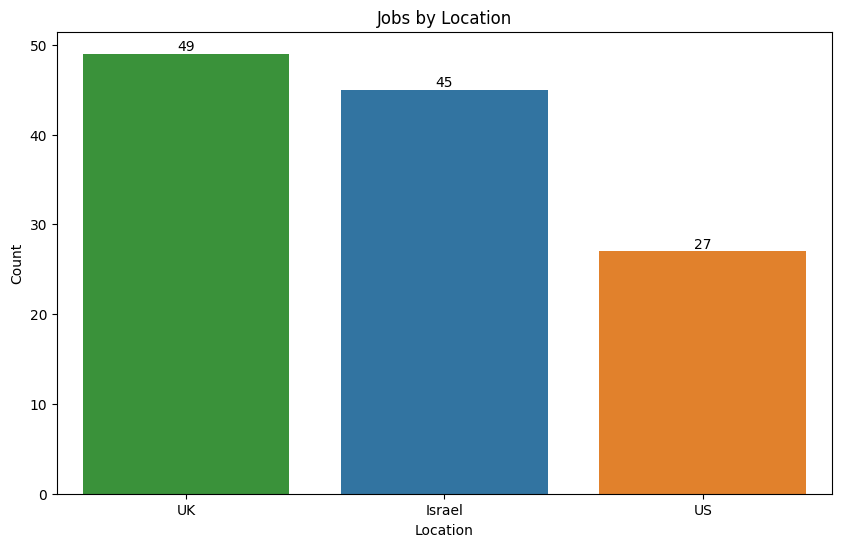

In [ ]:
# Distribution of jobs by country
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_DA, x='location', hue='location', order=df_DA['location'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Jobs by Location')

plt.show()

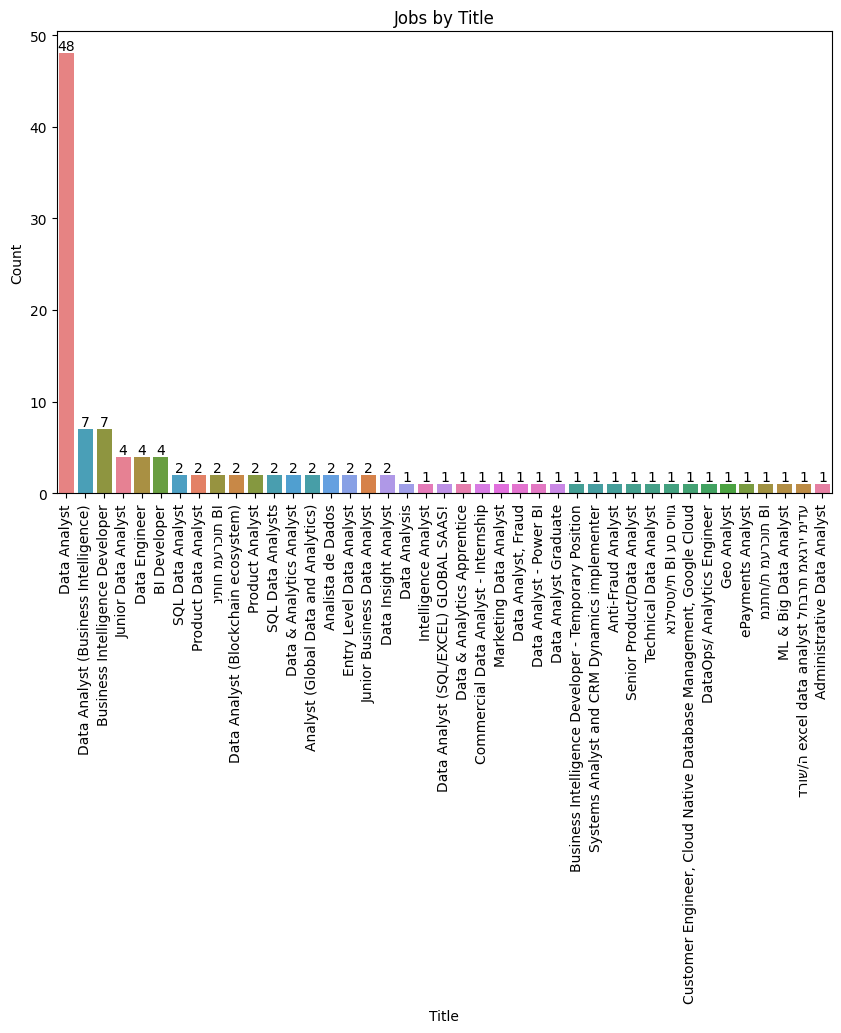

In [ ]:
# Distribution of jobs by Title
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_DA, x='title', hue='title', order=df_DA['title'].value_counts().index)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Jobs by Title')

plt.show()


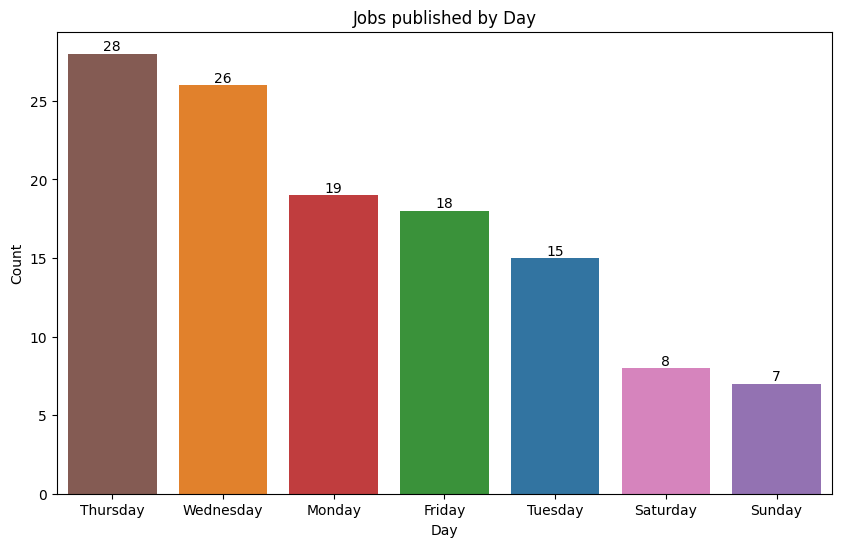

In [ ]:
# When the jobs where posted

df_DA['date'] = pd.to_datetime(df_DA['date'])
df_DA['day'] = df_DA['date'].dt.day_name()

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df_DA, x='day', hue='day', order=df_DA['day'].value_counts().index)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Jobs published by Day')

plt.show()

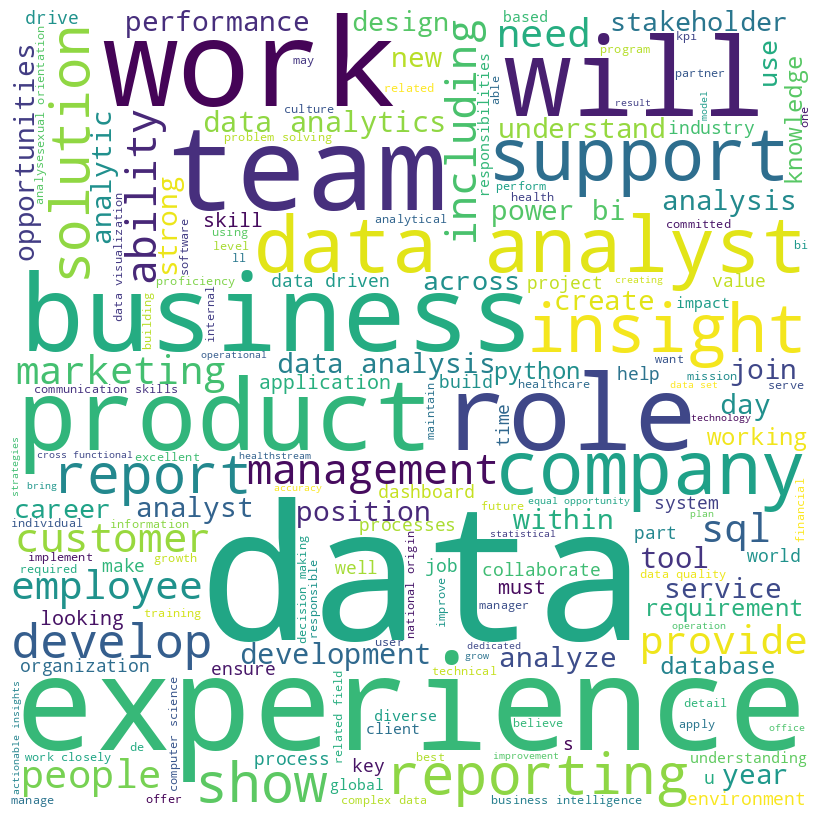

In [ ]:
# First view from the description column to understand most common words in the requirements from the job postings
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the df_DA
for val in df_DA['description']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Requirements

In [34]:
def extract_requirements(job_description):
    # Define keywords that signal the start of the requirements section
    keywords = [
        r"All you need is",
        r"What will I bring to the team\?",
        r"\brequirements\b",
        r"You Have",
        r"What You'll Bring",
        r"What You Bring",
        r"someone who has the following",
        r"bring\sto\sthe\stable.",
        r"What you need is",
        r"Qualifications",
        r"Qualifications Required",
        r"Requirements skills",
        r"Requirements\s*and\s*Qualifications",
        r"skills",
        r"What You Need",
        r"Qualifications And Education",
        r"Qualifications & Experience",
        r"EDUCATION AND/OR TRAINING",
        r"Make You Stand Out",
        r"The ideal candidate will have",
        r"Minimum Qualifications",
        r"what we need",
        r"\bmust have\b",
        r"Experience:",
        r"for you if you:",
        r"\bexperience in\b",
        r"\bmandatory\b",
        r"Our Must-haves",
        r"You are fit for this job because you:",
        r"possess\s+the\s+following\s+qualifications\s+and\s+attributes\s*:"

    ]

    # Create a single regex pattern with the keywords
    pattern = r"(?i)(" + "|".join(keywords) + r")(?::|\n\n)\s*(.*)"

    # Search for the pattern in the job description
    match = re.search(pattern, job_description, re.DOTALL)

    if match:
        # Extract the matched group containing the requirements
        return match.group(2).strip()
    else:
        return None


In [35]:
# Apply the function to the 'description' column
df_DA['Requirements'] = df_DA['description'].apply(extract_requirements)

In [51]:
df_DA['Requirements'].isna().sum()

22

In [52]:
df_DA.dropna(subset=['Requirements'], inplace=True)

In [53]:
split_requirements = df_DA['Requirements'].apply(lambda x: x.split('\n') if isinstance(x, str) else x)

split_requirements.head()

,Requirements
0,[Bachelor's or Master's degree in a relevant f...
1,"[+2 years of experience in Data analytics, exp..."
2,[At least 2 years experience in a data-driven ...
3,[BSc/BA in highly quantitative field such as m...
4,[BSc. in Computer Science/statistics / informa...


In [ ]:
response = model.generate_content(f'''"In the following dataframe, {split_requirements}, each row represents different requirements for an open job.
I need to extract only the job requirements from each row, excluding any explanations about the company or other non-essential information (e.g., company culture, diversity statements, etc.).
Return the filtered results containing only the relevant job requirements."''')
to_markdown(response.text)

> 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  [[Bachelor's or Master's degree in a relevant field (e.g., Statistics, Mathematics, Computer Science) - A MUST, 1-2 years of experience in data analysis or a related field., Proficiency in SQL, Experience with data visualization tools (Tableau, Power BI, etc..)., Strong analytical skills with the ability to interpret complex data sets., Experience with statistical analysis and A/B testing., Familiarity with data pipelines and data processes., Familiarity with programming languages like Python or R is a plus.]]
> 1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [[+2 years of experience in Data analytics, experimentation, A/B tests, and evaluation of marketing campaigns on multiple platforms., Ability to represent complex information in easily understood visualizations (including Tableau, Excel (can perform complex functions))., Advanced proficiency in SQL enabling comprehensive database querying, complex data manipulation, and insightful analysis, Highly experienced with data visualization tools (e.g. Tableau, Periscope). for building regular reports/dashboards to track multiple channel performance., Ability to communicate the analytical story clearly to executives, channel owners, and partners, and influence strategic business decisions., Strong quantitative, analytical, and problem-solving skills; must be very comfortable with data analysis and driving decision-making., Biased for action: willing to build the first prototype, and continuously improve based on learnings., Possess a natural curiosity to dive into the details and have a strong analytical mindset.]]
> 2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [[At least 2 years experience in a data-driven position., Bachelor's degree in Information Systems, Industrial Engineering, or a related field., Experience with SQL., Experience with Python and relevant packages., Experience with BI systems (Tableau - advantage)., Good background in statistics., Self-motivated with the ability to multi-task and work independently., Demonstrate a thorough attention to detail and the ability to perform in-depth analyses while considering the broader business context., Recommended - Background in a B2C company., Recommended - Understanding or interest in Financial Markets, Finance, or Online Trading.]]
> 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [[BSc/BA in highly quantitative field such as mathematics / Industrial Engineering / Economics / Statistics or equivalent academic knowledge., Outstanding analytical & technical skills., Strong SQL with experience in querying large, complex data sets., Self-motivated and independent., Ability to turn complex concepts into actionable recommendations., 1-2 years of analytical work experience, preferably for a web or mobile company, online gaming industry- Advantage.]]
> 4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [[BSc. in Computer Science/statistics / information systems or related fields, 2+ years of experience as a data analyst or a similar job, Proven experience in SQL queries., Experience in data analytics libraries in Python (pandas)., Experience with big data frameworks & solutions (Spark/Presto/Athena/Trino or similar), Fluent English]]
> 115                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [[Have previous experience in Analytical roles, Have excellent written communication skills, Are comfortable with Data Analysis tools (such as Power BI)]]
> 116                                                                                                                                                                                                           [[Education qualifications are not necessary but at least one year of experience withing the field of data, ETL or report creation is desirable.]]
> 118                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        [[Proven proficiency in database languages, specifically SQL and in visualisation tools including Power BI and Tableau with prior experience in application of these skills in a professional work environment., Strong numberical skills with an ability to manipulate data using statistical software such as R, SAS, or Pivot Tables Experience working with large financial and non-financial datasets, conducting data reconciliation, manipulation, visualisation and relevant product development, Educational Background: A strong university degree in a technical field such as math, physics, computer science, or engineering., Willingness to dive into the complexities of business and data, resolving existing issues and enhancing data quality., Strong SQL proficiency and experience with Python for data analysis. Familiarity with tools like Airflow, Postgres, and GCP is advantageous.]]
> 119                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  [[Strong analytical and problem-solving skills, , Familiarity with data modeling, , Comfortable querying, manipulating and transforming large datasets, , Experience with SQL and other data manipulation or reporting tools, , Good communication and stakeholder management skills, , Ability to work with non-technical stakeholders and bridge the gap between technical and business needs to drive value and insight from data]]

In [54]:
# Taking the answer as a dataframe
response = {
    "candidates": [
        {
            "content": {
                "parts": [
                    {
                        "text": "- Bachelor's or Master's degree in a relevant field (e.g., Statistics, Mathematics, Computer Science) - A MUST\n- 1-2 years of experience in data analysis or a related field.\n- Proficiency in SQL\n- Experience with data visualization tools (Tableau, Power BI, etc..).\n- Strong analytical skills with the ability to interpret complex data sets.\n- Experience with statistical analysis and A/B testing.\n- Familiarity with data pipelines and data processes.\n- Familiarity with programming languages like Python or R is a plus.\n\n- 2 years of experience in Data analytics, experimentation, A/B tests, and evaluation of marketing campaigns on multiple platforms.\n- Ability to represent complex information in easily understood visualizations (including Tableau, Excel (can perform complex functions)).\n- Advanced proficiency in SQL enabling comprehensive database querying, complex data manipulation, and insightful analysis\n- Highly experienced with data visualization tools (e.g. Tableau, Periscope). for building regular reports/dashboards to track multiple channel performance.\n- Ability to communicate the analytical story clearly to executives, channel owners, and partners, and influence strategic business decisions.\n- Strong quantitative, analytical, and problem-solving skills; must be very comfortable with data analysis and driving decision-making.\n- Biased for action: willing to build the first prototype, and continuously improve based on learnings.\n- Possess a natural curiosity to dive into the details and have a strong analytical mindset.\n\n- At least 2 years experience in a data-driven position.\n- Bachelor's degree in Information Systems, Industrial Engineering, or a related field.\n- Experience with SQL.\n- Experience with Python and relevant packages.\n- Experience with BI systems (Tableau - advantage).\n- Good background in statistics.\n- Self-motivated with the ability to multi-task and work independently.\n- Demonstrate a thorough attention to detail and the ability to perform in-depth analyses while considering the broader business context.\n- Background in a B2C company - Recommended.\n- Understanding or interest in Financial Markets, Finance, or Online Trading - Recommended.\n\n- Experience with SQL.\n- Experience with Python and relevant packages.\n- Experience with BI systems (Tableau - advantage).\n- Good background in statistics.\n- Self-motivated with the ability to multi-task and work independently.\n- Demonstrate a thorough attention to detail and the ability to perform in-depth analyses while considering the broader business context.\n- Background in a B2C company - Recommended.\n- Understanding or interest in Financial Markets, Finance, or Online Trading - Recommended.\n\n- BSc/BA in highly quantitative field such as mathematics / Industrial Engineering / Economics / Statistics or equivalent academic knowledge.\n- Outstanding analytical & technical skills.\n- Strong SQL with experience in querying large, complex data sets.\n- Self-motivated and independent.\n- Ability to turn complex concepts into actionable recommendations.\n- 1-2 years of analytical work experience, preferably for a web or mobile company, online gaming industry- Advantage.\n\n- BSc. in Computer Science/statistics / information systems or related fields\n- 2+ years of experience as a data analyst or a similar job\n- Proven experience in SQL queries.\n- Experience in data analytics libraries in Python (pandas).\n- Experience with big data frameworks & solutions (Spark/Presto/Athena/Trino or similar)\n- Fluent English\n\n- Have previous experience in Analytical roles\n- Have excellent written communication skills\n- Are comfortable with Data Analysis tools (such as Power BI)\n\n- Educational qualifications are not necessary but at least one year of experience withing the field of data, ETL or report creation is desirable.\n\n- Proven proficiency in database languages, specifically SQL and in visualisation tools including Power BI and Tableau with prior experience in application of these skills in a professional work environment.\n- Strong numberical skills with an ability to manipulate data using statistical software such as R, SAS, or Pivot Tables Experience working with large financial and non-financial datasets, conducting data reconciliation, manipulation, visualisation and relevant product development\n- Educational Background: A strong university degree in a technical field such as math, physics, computer science, or engineering.\n- Willingness to dive into the complexities of business and data, resolving existing issues and enhancing data quality.\n- Strong SQL proficiency and experience with Python for data analysis. Familiarity with tools like Airflow, Postgres, and GCP is advantageous.\n\n- Strong analytical and problem-solving skills\n- Familiarity with data modeling\n- Comfortable querying, manipulating and transforming large datasets\n- Experience with SQL and other data manipulation or reporting tools\n- Good communication and stakeholder management skills\n- Ability to work with non-technical stakeholders and bridge the gap between technical and business needs to drive value and insight from data"
                    }
                ]
            }
        }
    ]
}

# Extract the text content from the response
job_requirements_text = response['candidates'][0]['content']['parts'][0]['text']

# Split the text into individual job requirements separeted by the line breaks
job_requirements_list = job_requirements_text.split('\n')

# Remove any leading  from each requirement
job_requirements_list = [line[1:] for line in job_requirements_list]

# Create a DataFrame
df_job_requirements = pd.DataFrame(job_requirements_list, columns=['Job Requirements'])

# Drop empty rows
df_job_requirements.dropna(inplace=True)
df_job_requirements = df_job_requirements[df_job_requirements['Job Requirements'].str.strip() != '']


print(df_job_requirements)


                                     Job Requirements
0    Bachelor's or Master's degree in a relevant f...
1    1-2 years of experience in data analysis or a...
2                                  Proficiency in SQL
3    Experience with data visualization tools (Tab...
4    Strong analytical skills with the ability to ...
..                                                ...
65                     Familiarity with data modeling
66   Comfortable querying, manipulating and transf...
67   Experience with SQL and other data manipulati...
68   Good communication and stakeholder management...
69   Ability to work with non-technical stakeholde...

[61 rows x 1 columns]


In [55]:
# Calculate the frequency of words repetition
word_freq = df_job_requirements['Job Requirements'].str.split(expand=True).stack().value_counts()
word_freq

,count
and,32
in,26
with,26
data,19
to,18
...,...
"BI,",1
"(Tableau,",1
BSc/BA,1
highly,1


In [56]:
# Removing stoping words with NLTK
stop_words = set(stopwords.words('english'))

# Convert requirements in tokens without punctuation based on regex (using 'RegexpTokenizer' ) and lower case them
tokenizer = RegexpTokenizer(r'\w+')

tokens = [word.lower() for requirements in df_job_requirements['Job Requirements'] for word in tokenizer.tokenize(requirements)]


# Filter out stop words
filtered_tokens = [word for word in tokens if word not in stop_words]

# Filter single letter except for 'R' cause this can be related to the language
filtered_tokens = [word for word in filtered_tokens if not (re.fullmatch(r'[a-z]', word) and word != 'r')]
print (filtered_tokens)

['bachelor', 'master', 'degree', 'relevant', 'field', 'statistics', 'mathematics', 'computer', 'science', 'must', '1', '2', 'years', 'experience', 'data', 'analysis', 'related', 'field', 'proficiency', 'sql', 'experience', 'data', 'visualization', 'tools', 'tableau', 'power', 'bi', 'etc', 'strong', 'analytical', 'skills', 'ability', 'interpret', 'complex', 'data', 'sets', 'experience', 'statistical', 'analysis', 'testing', 'familiarity', 'data', 'pipelines', 'data', 'processes', 'familiarity', 'programming', 'languages', 'like', 'python', 'r', 'plus', '2', 'years', 'experience', 'data', 'analytics', 'experimentation', 'tests', 'evaluation', 'marketing', 'campaigns', 'multiple', 'platforms', 'ability', 'represent', 'complex', 'information', 'easily', 'understood', 'visualizations', 'including', 'tableau', 'excel', 'perform', 'complex', 'functions', 'advanced', 'proficiency', 'sql', 'enabling', 'comprehensive', 'database', 'querying', 'complex', 'data', 'manipulation', 'insightful', 'ana

In [57]:
# Combine power with BI as a single token
for idx, word in enumerate(filtered_tokens):
    if word == 'power' and idx < len(filtered_tokens) - 1:  # Ensure the index is valid
        if filtered_tokens[idx + 1] == 'bi':
            # Combine "power" and "bi" into "power bi"
            filtered_tokens[idx] = 'power bi'
            # Remove the next token "bi"
            filtered_tokens.pop(idx + 1)

In [58]:
# Combine years with experience as single token
for idx, word in enumerate(filtered_tokens):
    if word == '1' and idx < len(filtered_tokens) - 1:  # Ensure the index is valid
        if filtered_tokens[idx + 1] == '2':
            # Combine years into single line
            filtered_tokens[idx] = '1-2 years experience'
            # Remove the next following word
            filtered_tokens.pop(idx + 1)
    elif word == '2' and idx < len(filtered_tokens) - 1:
        if filtered_tokens[idx + 1] == 'years':
            # Combine years into single line
            filtered_tokens[idx] = '2 years experience'
            # Remove the next following word
    elif word == '1-2 years experience' or word == '2 years experience':
        if filtered_tokens[idx + 1] == 'experience':
            # Combine years into single line
            filtered_tokens.pop(idx + 1)


# Print the updated list to verify the result
print(filtered_tokens)



['bachelor', 'master', 'degree', 'relevant', 'field', 'statistics', 'mathematics', 'computer', 'science', 'must', '1-2 years experience', 'years', 'experience', 'data', 'analysis', 'related', 'field', 'proficiency', 'sql', 'experience', 'data', 'visualization', 'tools', 'tableau', 'power bi', 'etc', 'strong', 'analytical', 'skills', 'ability', 'interpret', 'complex', 'data', 'sets', 'experience', 'statistical', 'analysis', 'testing', 'familiarity', 'data', 'pipelines', 'data', 'processes', 'familiarity', 'programming', 'languages', 'like', 'python', 'r', 'plus', '2 years experience', 'years', 'experience', 'data', 'analytics', 'experimentation', 'tests', 'evaluation', 'marketing', 'campaigns', 'multiple', 'platforms', 'ability', 'represent', 'complex', 'information', 'easily', 'understood', 'visualizations', 'including', 'tableau', 'excel', 'perform', 'complex', 'functions', 'advanced', 'proficiency', 'sql', 'enabling', 'comprehensive', 'database', 'querying', 'complex', 'data', 'manip

In [59]:
# Calculate the frequency of words repetition
word_freq = pd.Series(filtered_tokens).value_counts()
word_freq

,count
data,24
experience,23
ability,10
sql,9
skills,8
...,...
tests,1
experimentation,1
plus,1
programming,1


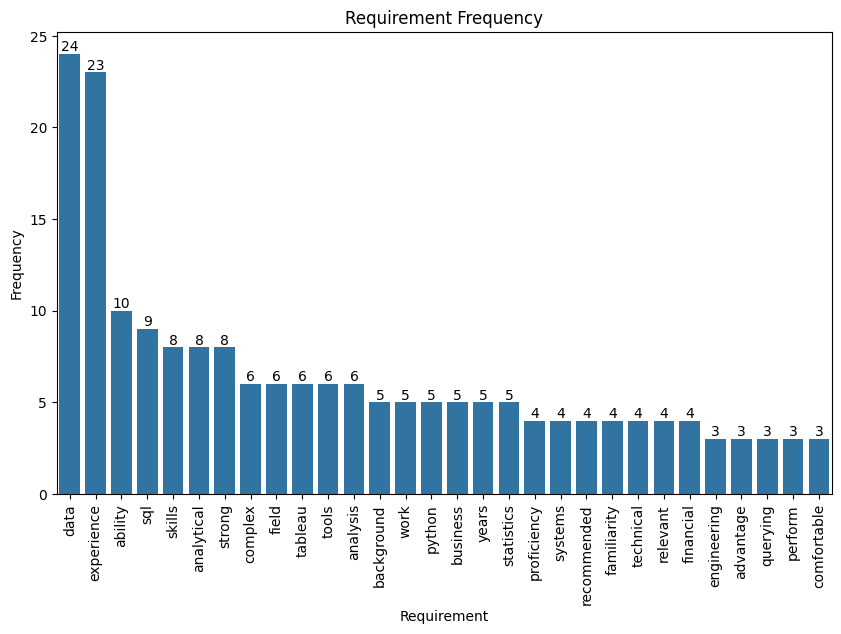

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=word_freq.index[:30], y=word_freq.values[:30])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Requirement')
plt.ylabel('Frequency')
plt.title('Requirement Frequency')
plt.xticks(rotation=90)
plt.show()

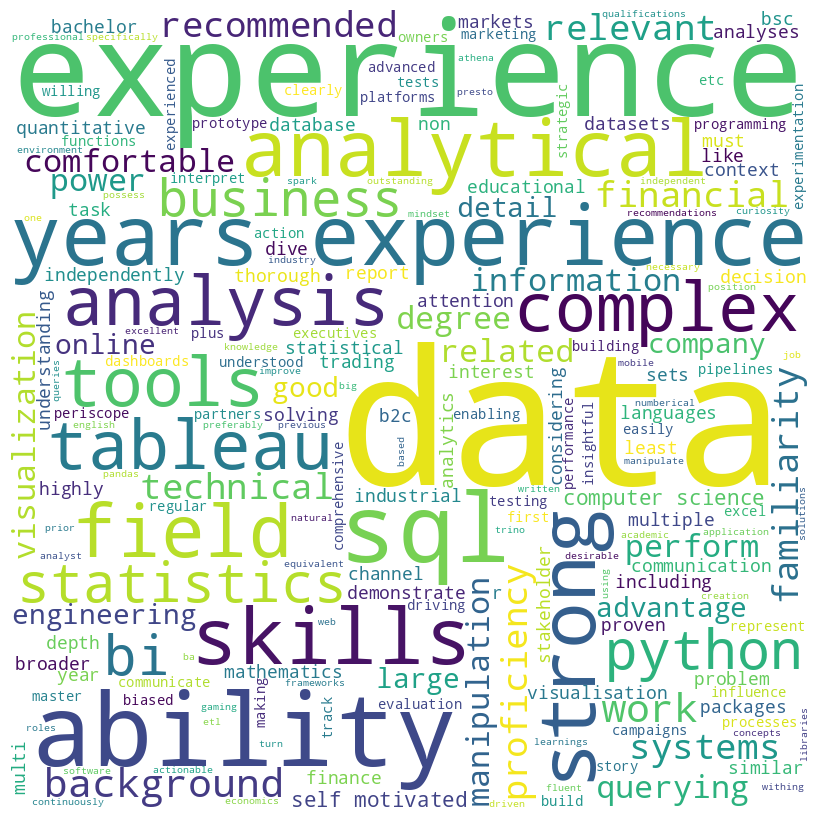

In [60]:
comment_words = ''

for val in filtered_tokens:
    val = str(val)
    comment_words += val+" "

wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stop_words,
                  min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
skills = model.generate_content(f'''extract only the words related to skills or tools that are necessary for a data analyst from the list of tokens here {filtered_tokens} and divide them in 2 lists''')
to_markdown(skills.text)

> **Skills List:**
> 
> * SQL
> * Tableau
> * Power BI
> * Python
> * R
> * Programming
> * Pipelines
> * Processes
> * Data analysis
> * Visualization
> * Excel
> * Tools
> * Analysis
> * Data interpretation
> * Statistical analysis
> * Quantitative analysis
> * Querying
> * Data manipulation
> * Data visualization
> * Communication
> 
> **Tools List:**
> 
> * SQL
> * Python
> * R
> * Tableau
> * Power BI
> * Presto
> * Trino
> * SAS
> * Airflow
> * Postgres
> * GCP

In [50]:
tools = ['tableau', 'power bi', 'sql', 'python', 'r', 'excel', 'sas', 'airflow', 'postgres', 'gcp', 'presto', 'trino', 'airflow', 'athena' ]
da_tools = [i for i in filtered_tokens if i  in tools ]
da_tools = pd.Series(da_tools).value_counts().reset_index()
da_tools.columns = ['Tools', 'Frequency']
da_tools

,Tools,Frequency
0,sql,9
1,tableau,6
2,python,5
3,r,2
4,excel,1
5,presto,1
6,athena,1
7,trino,1
8,sas,1
9,airflow,1


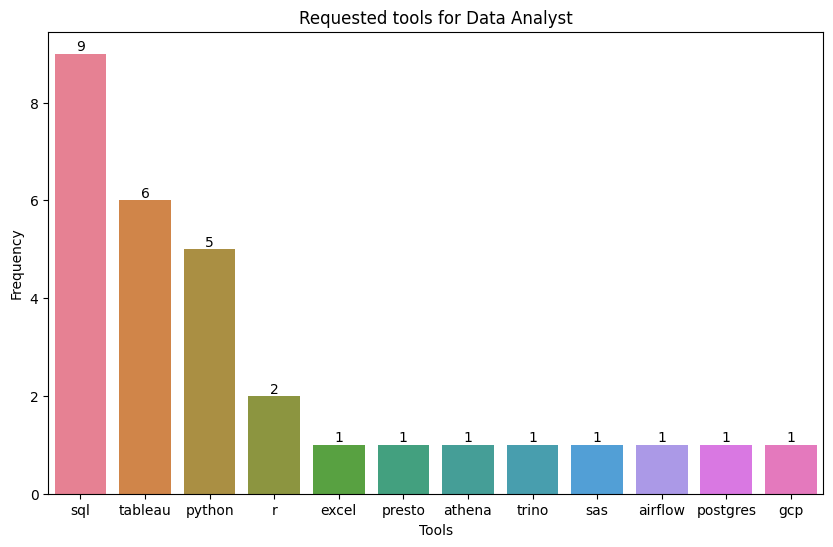

In [61]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=da_tools['Tools'], y= da_tools['Frequency'], hue=da_tools['Tools'])
for i in ax.containers:
  ax.bar_label(i)
plt.xlabel('Tools')
plt.ylabel('Frequency')
plt.title ('Requested tools for Data Analyst')
plt.show()


In [ ]:
degree = [i for i in filtered_tokens if i == 'degree']
degree = pd.Series(degree).value_counts()
degree

,count
degree,3


In [67]:
keywords = ['sql', 'python', 'tableau', 'r', 'excel', 'power', 'google']

# Tokenize and count keyword occurrences in each row
def tokenize_and_count(requirements, keywords):
   # Check if the requirements column is None
    if requirements is None:
        return {keyword: 0 for keyword in keywords}  # Return zero for all keywords if None
    # Tokenize the text and lower case
    tokens = word_tokenize(requirements.lower())
    # Create a Counter object to count keyword occurrences
    keyword_count = Counter(tokens)
    # Count the occurrences of each keyword from the list
    keyword_occurrences = {keyword: keyword_count[keyword] for keyword in keywords}
    return keyword_occurrences

# Apply the function to each row in the 'Requirements' column
df_DA['Keyword Counts'] = df_DA['Requirements'].apply(lambda req: tokenize_and_count(req, keywords))



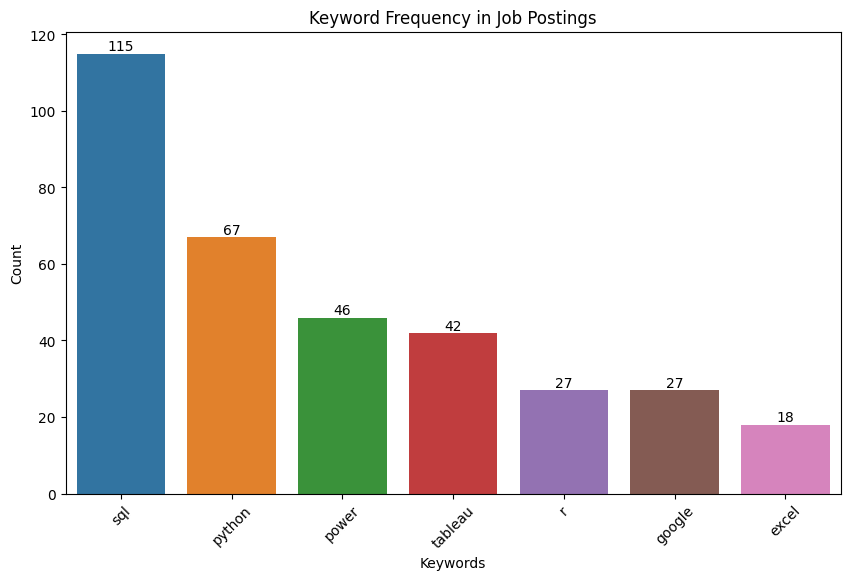

In [79]:
# Aggregate counts of all keywords across all job posts
keyword_totals = Counter()

for keyword_dict in df_DA['Keyword Counts']:
    keyword_totals.update(keyword_dict)

# Convert the totals to a pandas Series for plotting
keyword_totals_series = pd.Series(keyword_totals).reset_index()

# Change columns name
keyword_totals_series.columns = ['keyword', 'count']

# Sort values by count
keyword_totals_series = keyword_totals_series.sort_values(by='count', ascending=False)

# Plot the keyword counts as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='keyword', y='count', data=keyword_totals_series, hue= 'keyword')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Keyword Frequency in Job Postings')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Responsibilities

In [43]:
responsabilities = model.generate_content(f'''From the following dataframe {df_DA} in the column description, extract the keywords that introduce to the description of the responsibilities related to the job.
Like for example: Responsabilities, you will, what you'll do ''')
to_markdown(responsabilities.text)

> - Job Description
> - Description
> - Responsibilities
> - What you'll do
> - What you will be doing
> - Your role
> - Your responsibilities
> - Key Responsibilities
> - Responsibilities include
> - Duties
> - Tasks

In [ ]:
def extract_responsibilities (job_description):
    # Define keywords that signal the start of the requirements section
  keywords = [
        r"Key Responsibilities",
        r"Responsibilities",
        r"What you'll do",
        r"You will",
        r"Responsibilities will include",
        r"You will be responsible",
        r"What will you do",
        r"What will your job look like?",
        r"you will help",
        r"Primary Responsibilities",
        r"Duties Include",
        r"Main Responsibilities",
        r"Day-to-Day Responsibilities",
        r"Job Responsibilities",
        r"Your role",
        r"In this role, you will",
        r"The role involves",
        r"What you’ll be working on",
        r"Your responsibilities",
        r"What we expect",
        r"Key Duties",
        r"As part of the team",
        r"Tasks include",
        r"You will contribute by",
        r"Role expectations",
        r"What we need you to do",
        r"The Position requires"
    ]

    # Create a single regex pattern with the keywords
  pattern = r"(?i)(" + "|".join(keywords) + r")(?::|\n\n)\s*(.*)"

  # Search for the pattern in the job description
  match = re.search(pattern, job_description, re.DOTALL)

  if match:
      # Extract the matched group containing the requirements
      return match.group(2).strip()
  else:
      return None


In [ ]:
# Apply the function to the 'description' column
df_DA['Responsibilities'] = df_DA['description'].apply(extract_responsibilities)

In [ ]:
df_DA.dropna(subset=['Responsibilities'], inplace=True)
df_DA['Responsibilities'].head()

,Responsibilities
0,"Collect, process and analyze complex data sets to provide actionable insights\nDevelop and maintain dashboards and reports.\nCollaborate with different stakeholders across the company to understand data needs.\nIdentify trends and patterns in data to inform product and business strategy.\nConduct ad hoc analysis and provide recommendations.\nDesign new processes with various stakeholders to enhance data-driven decisions across the company.\nData modeling and tables modeling to enhance data usage efficiency\nYou will report to the Data Analytics Team Lead.\n\n\nWhat You'll Bring:\n\n\nBachelor's or Master's degree in a relevant field (e.g., Statistics, Mathematics, Computer Science) - A MUST\n1-2 years of experience in data analysis or a related field.\nProficiency in SQL\nExperience with data visualization tools (Tableau, Power BI, etc..).\nStrong analytical skills with the ability to interpret complex data sets.\nExperience with statistical analysis and A/B testing.\nFamiliarity with data pipelines and data processes.\nFamiliarity with programming languages like Python or R is a plus.\n\n\nThe OpenWeb Culture\n\nWe offer a dynamic and unconventional work environment that spans from NYC to London, France, Kyiv, and Tel Aviv, bringing together a diverse group of world-class and high-caliber techies, wordsmiths, entrepreneurs, and creative thinkers. We empower every individual across our global team to be a catalyst for change and strive to create a work environment where you can have the utmost autonomy over your role and projects from start to finish. If you want to join an innovative tech company where you can challenge yourself, have the freedom to own your work, and make a lasting impact, then you have a spot within our growing community!\n\nOpenWeb is committed to building diverse teams and upholding an equal employment workplace that is free from discrimination. We hire amazing individuals regardless of their race, color, ancestry, religion, sex, gender identity, national origin, sexual orientation, age, citizenship, marital status, pregnancy, medical conditions, genetic information, disability, or Veteran status.\n\nBuild your skills with us as you build a better web for everyone. Join us!\n\nAlso, we care about your privacy! Please take a moment to review OpenWeb's Privacy Practices\nShow more"
1,"Develop and refine a comprehensive measurement framework to assess the ROI from upper-funnel & lifecycle marketing investments, facilitating strategic decision-making.\nUtilize diverse metrics and data sources to present a cohesive overall story for stakeholders across the company.\nCollaborate closely with the Marketing team to design experiments and conduct ongoing campaign analyses that generate actionable insights.\nBuild measurement plans based on strategic imperatives, communication objectives and media strategies.\nDesign and implement reporting dashboards that track important metrics and performance trends, enabling the marketing team to make more informed decisions.\n\n\nYou Have\n\n\n+2 years of experience in Data analytics, experimentation, A/B tests, and evaluation of marketing campaigns on multiple platforms.\nAbility to represent complex information in easily understood visualizations (including Tableau, Excel (can perform complex functions)).\nAdvanced proficiency in SQL enabling comprehensive database querying, complex data manipulation, and insightful analysis\nHighly experienced with data visualization tools (e.g. Tableau, Periscope). for building regular reports/dashboards to track multiple channel performance.\nAbility to communicate the analytical story clearly to executives, channel owners, and partners, and influence strategic business decisions.\nStrong quantitative, analytical, and problem-solving skills; must be very comfortable with data analysis and driving decision-making.\nBiased for action: willing to build the first prototype, and continuously improve based on learnings.\nPo